In [38]:
import numpy as np;
from numpy import linalg; import scipy as scipy; from scipy import linalg;
import matplotlib.pyplot as plt; import matplotlib

1

(A)

In [39]:
w2 = np.array([
    [-0.6833, -0.79001 ],
    [2.2394, -1.9829 ]])

b2 = np.array([
    [ 7.9758 ],
    [-1.1627 ]])

w3 = np.array([
    [ 1.5018, -3.9478 ],
    [6.8604, -0.10918 ],
    [3.5428, -3.2658 ]])

b3 = np.array([
    [-1.2487 ],
    [ 0.55873 ],
    [ 2.8432 ]])

w4 = np.array([
    [ 15.212, 14.739, -1.8834 ],
    [-9.6023, -8.7817, -9.6393 ],
    [-14.059, 7.8012, 4.4174 ],
    [ 6.1827, -14.169, 6.0915 ]])

b4 = np.array([
    [-1.3401 ],
    [ 3.1183 ],
    [-1.0419 ],
    [-1.0423 ]])

In [40]:
def linear(x, w, b):
    return np.dot(w, x) + b
    
def tansig(x):
    return 2.0 * (1.0 + np.exp(-2.0*x))**-1.0 - 1.0

def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Derivative of the tansig function
def tansig_prime(x):
    return 1.0 - tansig(x)**2

# Derivative of the softmax function
def softmax_prime(x):
    return np.diagflat(softmax(x))-softmax(x)@softmax(x.T)

In [41]:
a1 = np.array([
    [4],
    [5]
])

z2 = linear(a1, w2, b2)

a2 = tansig(z2)

z3 = linear(a2, w3, b3)

a3 = tansig(z3)

z4 = linear(a3, w4, b4)

a4 = softmax(z4)

output = np.argmax(a4)

print('a4: \n', a4)
print('And so, the class this belongs to (index+1) is class', output+1)

a4: 
 [[1.00000000e+00]
 [3.85082200e-23]
 [1.41748367e-13]
 [1.31896618e-13]]
And so, the class this belongs to (index+1) is class 1


(B)

In [42]:
epsilon = 0.3

# Perturbed w2
perturbed_w2 = w2.copy()
perturbed_w2 += epsilon

# Perturbed b2
perturbed_b2 = b2.copy()
perturbed_b2 += epsilon

# Perturbed w3
perturbed_w3 = w3.copy()
perturbed_w3 += epsilon

# Perturbed b3
perturbed_b3 = b3.copy()
perturbed_b3 += epsilon


In [43]:
perturbed_z2 = linear(a1, perturbed_w2, perturbed_b2)

perturbed_a2 = tansig(perturbed_z2)

perturbed_z3 = linear(perturbed_a2, perturbed_w3, perturbed_b3)

perturbed_a3 = tansig(perturbed_z3)

perturbed_z4 = linear(perturbed_a3, w4, b4)

perturbed_a4 = softmax(perturbed_z4)

output = np.argmax(perturbed_a4)

print('perturbed_a4: \n', perturbed_a4)
print('And so, the class this belongs to (index+1) is class', output+1)

perturbed_a4: 
 [[1.64900989e-12]
 [4.83483608e-14]
 [1.00000000e+00]
 [8.61356174e-18]]
And so, the class this belongs to (index+1) is class 3


(C)

In [44]:
# Cost for perturbed
C_perturbed = 0.5 * sum((perturbed_a4-a4)**2)
dcost = perturbed_a4-a4

print('Cost for training data point & label: ', C_perturbed[0])
print('dcost: \n', dcost)

Cost for training data point & label:  0.9999999999962381
dcost: 
 [[-1.00000000e+00]
 [ 4.83483607e-14]
 [ 1.00000000e+00]
 [-1.31888005e-13]]


In [45]:
sprime = softmax_prime(z4)

delta4 = sprime@dcost
nabla_b4 = delta4
nabla_w4 = delta4@perturbed_a3.T

delta3 = (w4.T@delta4)*tansig_prime(z3)
nabla_b3 = delta3
nabla_w3 = delta3@perturbed_a2.T

delta2 = (perturbed_w3.T@delta3)*tansig_prime(z2)
nabla_b2 = delta2
nabla_w2 = delta2@a1.T

print('nabla_b4: \n', nabla_b4)
print('nabla_w4: \n', nabla_w4)
print('nabla_b3: \n', nabla_b3)
print('nabla_w3: \n', nabla_w3)
print('nabla_b2: \n', nabla_b2)
print('nabla_w2: \n', nabla_w2)

nabla_b4: 
 [[-4.15418343e-13]
 [ 3.85082200e-23]
 [ 2.83496734e-13]
 [ 1.31896618e-13]]
nabla_w4: 
 [[ 3.89863386e-13 -4.15418274e-13 -4.15371237e-13]
 [-3.61393408e-23  3.85082136e-23  3.85038535e-23]
 [-2.66057093e-13  2.83496687e-13  2.83464588e-13]
 [-1.23782840e-13  1.31896596e-13  1.31881662e-13]]
nabla_b3: 
 [[-1.62349981e-14]
 [-4.60422379e-17]
 [ 1.52665897e-19]]
nabla_w3: 
 [[-1.62289316e-14 -1.14719687e-14]
 [-4.60250334e-17 -3.25343502e-17]
 [ 1.52608851e-19  1.07876723e-19]]
nabla_b2: 
 [[-7.71350875e-15]
 [ 3.31878773e-15]]
nabla_w2: 
 [[-3.08540350e-14 -3.85675437e-14]
 [ 1.32751509e-14  1.65939387e-14]]


In [46]:
# Update weights & biases with learning rate η
η = 7 * (10**8)

w2_new = w2 - η * nabla_w2
b2_new = b2 - η * nabla_b2
w3_new = w3 - η * nabla_w3
b3_new = b3 - η * nabla_b3
w4_new = w4 - η * nabla_w4
b4_new = b4 - η * nabla_b4

print('w2_new: \n', w2_new)
print('b2_new: \n', b2_new)
print('w3_new: \n', w3_new)
print('b3_new: \n', b3_new)
print('w4_new: \n', w4_new)
print('b4_new: \n', b4_new)


w2_new: 
 [[-0.6832784  -0.789983  ]
 [ 2.23939071 -1.98291162]]
b2_new: 
 [[ 7.9758054 ]
 [-1.16270232]]
w3_new: 
 [[ 1.50181136 -3.94779197]
 [ 6.86040003 -0.10917998]
 [ 3.5428     -3.2658    ]]
b3_new: 
 [[-1.24868864]
 [ 0.55873003]
 [ 2.8432    ]]
w4_new: 
 [[ 15.2117271   14.73929079  -1.88310924]
 [ -9.6023      -8.7817      -9.6393    ]
 [-14.05881376   7.80100155   4.41720157]
 [  6.18278665 -14.16909233   6.09140768]]
b4_new: 
 [[-1.33980921]
 [ 3.1183    ]
 [-1.04209845]
 [-1.04239233]]


In [47]:
# Reclassify a1
a1 = np.array([
    [4],
    [5]
])

z2_new = linear(a1, w2_new, b2_new)

a2_new = tansig(z2_new)

z3_new = linear(a2_new, w3_new, b3_new)

a3_new = tansig(z3_new)

z4_new = linear(a3_new, w4_new, b4_new)

a4_new = softmax(z4_new)

output = np.argmax(a4_new)

# Cost for perturbed
C_new = 0.5 * sum((a4_new-a4)**2)

print('a4_new: \n', a4_new)
print('And so, the class this belongs to (index+1) is class', output+1)
print('New cost function: ', C_new)

a4_new: 
 [[1.00000000e+00]
 [3.84849296e-23]
 [1.41604547e-13]
 [1.31792187e-13]]
And so, the class this belongs to (index+1) is class 1
New cost function:  [7.12617555e-32]


There is an improvement.

Value of final network output (output) - like with the original weights and biases, this network also classifies [4;5] as being in class 1. 

Output of the final softmax layer (a4_new) - a4_new is virtually the same as the original a4, but the values in rows 2, 3, and 4 all slightly decrease, meaning that we can be more confident that the point should be classified as being in class 1. 

Changed in the cost function - due to the large learning rate, the new cost function significantly decreases. 

2

In [48]:
X = np.array([
    [3,3,3,8,5,2,4,6,3,8,2,0,4,1,8,9,9,8,7,2,2,9,8,7,1,2,7,7,4,3,2,6,9],
    [7,5,1,5,3,9,5,7,10,7,8,2,3,1,6,7,8,8,3,8,8,9,4,9,4,7,5,0,8,6,10,2,9]])

y = np.array([
    [1,1,3,2,3,4,1,4,4,2,1,1,3,1,2,2,2,2,3,1,1,2,2,4,1,1,2,3,4,1,4,3,2]
    ])

/var/folders/7g/ch87mp1s7gschpcy31bh3nmh0000gn/T/ipykernel_16624/3352628156.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[0], X[1], cmap='viridis')


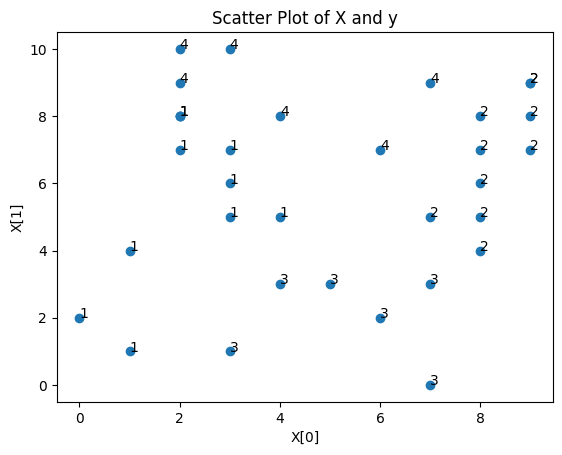

In [49]:
plt.scatter(X[0], X[1], cmap='viridis')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.title('Scatter Plot of X and y')

# Add labels to the points
for i in range(X.shape[1]):
    plt.text(X[0][i], X[1][i], str(y[0][i]))

plt.show()

In [50]:
input = np.array([
    [6],
    [4]])

def knn(X, y, input, k):
    distances = np.sqrt(np.sum((X - input)**2, axis=0))
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y[:, nearest_indices]
    counts = np.bincount(nearest_labels.flatten())
    most_common_label = np.argmax(counts)
    return nearest_indices, nearest_labels, most_common_label

ks = [2, 3, 5]

for i in ks:
    nearest_indices, nearest_labels, most_common_label = knn(X, y, input, i)
    print('k =', i)
    print('Nearest indices: ', nearest_indices)
    print('Nearest labels: ', nearest_labels)
    print('Classification (most common label): ', most_common_label)

k = 2
Nearest indices:  [18  4]
Nearest labels:  [[3 3]]
Classification (most common label):  3
k = 3
Nearest indices:  [18  4 26]
Nearest labels:  [[3 3 2]]
Classification (most common label):  3
k = 5
Nearest indices:  [18  4 26 22 31]
Nearest labels:  [[3 3 2 2 3]]
Classification (most common label):  3


3

(A) / (B)

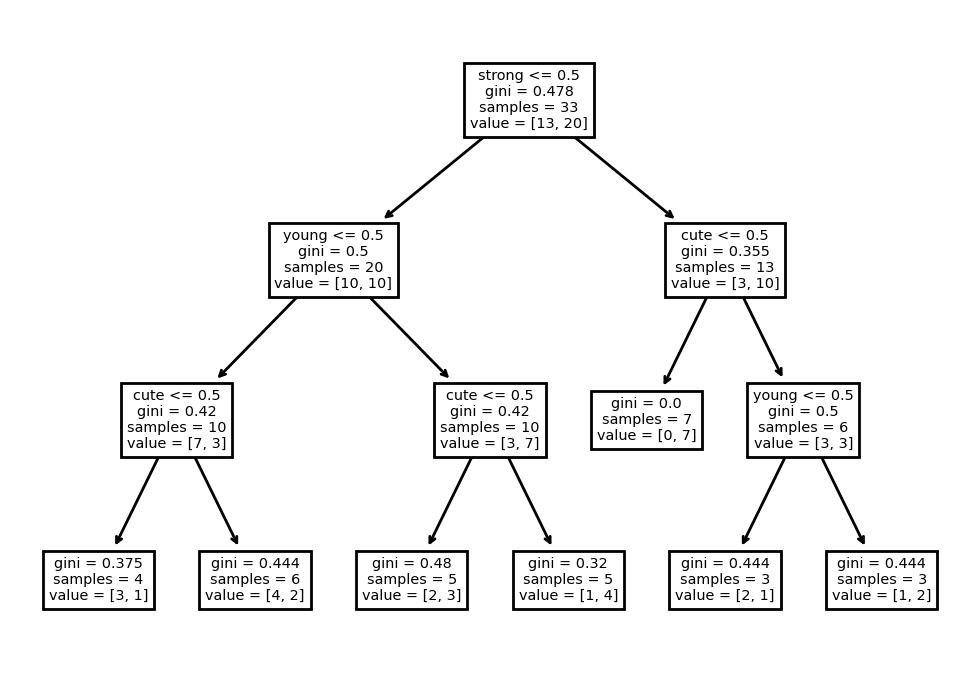

Summary or probabilities for deciding on first split of data:
total cute=17, interesting&take=9, probability=0.529412

total strong=13, useful&take=10, probability=0.769231

total young=15, fun&take=11, probability=0.733333

"strong" leads to highest probability, so use that for first split.


In [ ]:
## Decision tree example from class notes solved using library routine: 
## A classification problem: course selection, using discrete attributes and 
## a discrete label.
## Applied Math 120: Linear Algebra and Big Data
## Eli Tziperman, 202203
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree

## Data:
#    cute , strong , young ,  recommendation (1=take, 0=don't)
DATA=np.array([
    [1          , 1      , 1   , 1],
    [1          , 1      , 1   , 1],
    [1          , 1      , 1   , 0],
     
    [1          , 0      , 1   , 1],
    [1          , 0      , 1   , 1],
    [1          , 0      , 1   , 1],
    [1          , 0      , 1   , 1],
    [1          , 0      , 1   , 0],

    [1          , 1      , 0   , 1],
    [1          , 1      , 0   , 0],
    [1          , 1      , 0   , 0],

    [1          , 0      , 0   , 1],
    [1          , 0      , 0   , 1],
    [1          , 0      , 0   , 0],
    [1          , 0      , 0   , 0],
    [1          , 0      , 0   , 0],
    [1          , 0      , 0   , 0],


    [0          , 1      , 1   , 1],
    [0          , 1      , 1   , 1],

    [0          , 0      , 1   , 1],
    [0          , 0      , 1   , 1],
    [0          , 0      , 1   , 1],
    [0          , 0      , 1   , 0],
    [0          , 0      , 1   , 0],

    [0          , 1      , 0   , 1],
    [0          , 1      , 0   , 1],
    [0          , 1      , 0   , 1],
    [0          , 1      , 0   , 1],
    [0          , 1      , 0   , 1],

    [0          , 0      , 0   , 1],
    [0          , 0      , 0   , 0],
    [0          , 0      , 0   , 0],
    [0          , 0      , 0   , 0]])
X=DATA[:,0:3]
Y=DATA[:,3]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#tree1 = fitctree(X,Y,'CategoricalPredictors',[1, 2, 3] ...
#                 ,'PredictorNames',{'interesting','useful','fun'} ...
#                 ,'ResponseName','recommendation' ...
#                 ,'MinLeafSize',1,'MergeLeaves','off' ...
#                 ,'MinParentSize',1)

#view(tree1,'Mode','graph','PruneLevel',max(tree1.PruneList))
plt.figure(dpi=200,figsize=(5,3.5),tight_layout=1)
tree.plot_tree(clf,feature_names=['cute','strong','young'])
plt.pause(0.1)

print("=============================================================")
print("Summary or probabilities for deciding on first split of data:")
print("=============================================================")
recommendation_interesting=np.sum((X[:,0]==1)*(Y==1))
total_interesting=np.sum(X[:,0]==1)
p_interesting=recommendation_interesting/total_interesting
print('total cute=%d, interesting&take=%d, probability=%g\n' \
        % (total_interesting,recommendation_interesting,p_interesting) )

recommendation_useful=sum((X[:,1]==1)*(Y==1))
total_useful=sum(X[:,1]==1)
p_useful=recommendation_useful/total_useful
print('total strong=%d, useful&take=%d, probability=%g\n'
        % (total_useful,recommendation_useful,p_useful) )

recommendation_fun=np.sum((X[:,2]==1)*(Y==1))
total_fun=np.sum(X[:,2]==1)
p_fun=recommendation_fun/total_fun
print('total young=%d, fun&take=%d, probability=%g\n'
        % (total_fun,recommendation_fun,p_fun) )

print('"strong" leads to highest probability, so use that for first split.')

5

(A)

N_a,N_b,N=1,9,10, variance_a,b=[0, 28.8985], variance=28.8985
N_a,N_b,N=2,8,10, variance_a,b=[2.80563, 24.2284], variance=27.034
N_a,N_b,N=3,7,10, variance_a,b=[4.88802, 20.5265], variance=25.4145
N_a,N_b,N=4,6,10, variance_a,b=[5.82927, 15.4004], variance=21.2297
N_a,N_b,N=5,5,10, variance_a,b=[9.89378, 13.4791], variance=23.3728
N_a,N_b,N=6,4,10, variance_a,b=[14.2838, 13.112], variance=27.3958
N_a,N_b,N=7,3,10, variance_a,b=[13.9975, 1.30889], variance=15.3064
N_a,N_b,N=8,2,10, variance_a,b=[22.8689, 0.4225], variance=23.2914
N_a,N_b,N=9,1,10, variance_a,b=[30.4479, 0], variance=30.4479


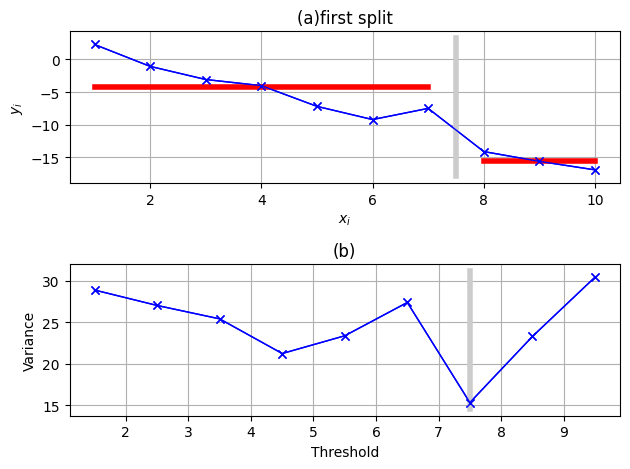

N_a,N_b,N=1,6,7, variance_a,b=[0, 8.02462], variance=8.02462
N_a,N_b,N=2,5,7, variance_a,b=[2.80563, 5.2434], variance=8.04903
N_a,N_b,N=3,4,7, variance_a,b=[4.88802, 3.51225], variance=8.40027
N_a,N_b,N=4,3,7, variance_a,b=[5.82927, 0.788956], variance=6.61822
N_a,N_b,N=5,2,7, variance_a,b=[9.89378, 0.731025], variance=10.6248
N_a,N_b,N=6,1,7, variance_a,b=[14.2838, 0], variance=14.2838


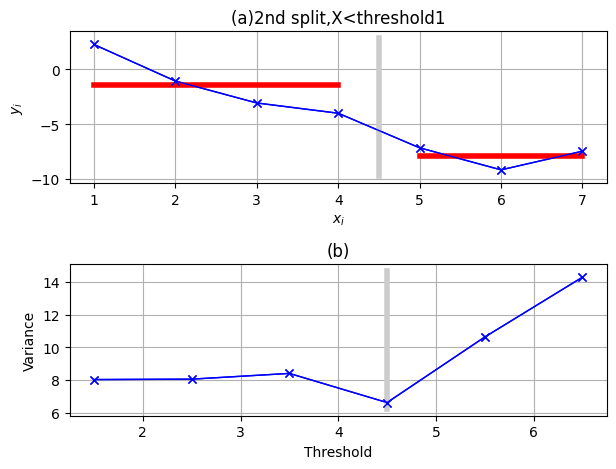

N_a,N_b,N=1,2,3, variance_a,b=[0, 0.4225], variance=0.4225
N_a,N_b,N=2,1,3, variance_a,b=[0.5625, 0], variance=0.5625


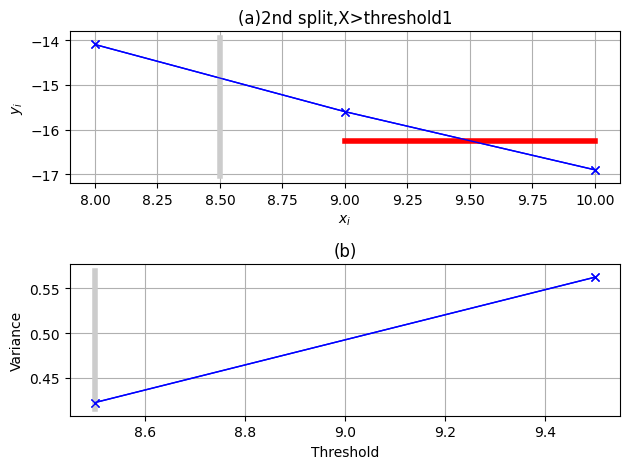

In [ ]:
X = np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

y = np.array([ 2.29, -1.06, -3.07, -4.01, -7.18, -9.2, -7.49, -14.1, -15.6, -16.9])

########################################################################
# decision_tree3_min_variance_1d_regression_manually()
########################################################################
## Constructing a 1d regression tree using the minimization of variance
## without using library routines.
## Eli, APM120, 202203

import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib


########################################################################
def find_optimal_threshold(X,y,plot_title,ifigure):
########################################################################
    # try all thresholds, find the one that leads to minimum Variance

    N=len(X); # data assumed one dimensional
    plot_threshold=np.zeros((N-1,1))
    plot_variance=np.zeros((N-1,1))
    min_variance=10e10
    for i in range(N-1):
        threshold=(X[i]+X[i+1])/2
        variance=calc_variance(X,y,threshold)
        plot_threshold[i]=threshold
        plot_variance[i]=variance
        if variance< min_variance:
            min_variance=variance
            i_min_variance=i
            threshold_min_variance=threshold
        #print("i=%d, min_variance=%g, i_min_variance=%d, threshold_min_variance=%g" 
        #      % (i,min_variance,i_min_variance,threshold_min_variance) )

    plt.figure(ifigure);ifigure=ifigure+1
    plt.subplot(2,1,1)
    plt.plot(X,y,'bx-',linewidth=1)
    my_ylim=plt.ylim()
    plt.plot([threshold_min_variance,threshold_min_variance],my_ylim,color=[0.8,0.8,0.8],linewidth=4)
    xx=X[X<threshold_min_variance]
    yy=xx*0+np.mean(y[X<threshold_min_variance])
    plt.plot(xx,yy,color='r',linewidth=4)
    xx=X[X>threshold_min_variance]
    yy=xx*0+np.mean(y[X>threshold_min_variance])
    plt.plot(xx,yy,color='r',linewidth=4)
    plt.plot(X,y,'bx-',linewidth=1)
    plt.grid()
    plt.title('(a)'+plot_title)
    plt.xlabel("$x_i$")
    plt.ylabel("$y_i$")

    plt.subplot(2,1,2)
    plt.plot(plot_threshold,plot_variance,'bx-',linewidth=1)
    my_ylim=plt.ylim()
    plt.plot([threshold_min_variance,threshold_min_variance],my_ylim,color=[0.8,0.8,0.8],linewidth=4)
    plt.plot(plot_threshold,plot_variance,'bx-',linewidth=1)
    plt.title('(b)')
    plt.xlabel("Threshold")
    plt.ylabel("Variance")
    plt.grid()

    plt.tight_layout()
    plt.pause(0.01)
    
    return threshold_min_variance,ifigure


########################################################################
def calc_variance(X,y,threshold):
########################################################################
    ## Divide the data points in X based on threshold and calculate the 
    ## combined weighted average variance index for the two resulting sets.
    X_set_a=X[X<threshold]
    X_set_b=X[X>threshold]
    N=len(X)
    N_a=len(X_set_a)
    N_b=len(X_set_b)
    y_set_a=y[X<threshold]
    y_set_b=y[X>threshold]
    variance_a=np.var(y_set_a)
    variance_b=np.var(y_set_b)
    variance=variance_a+variance_b
    print("N_a,N_b,N=%d,%d,%d, variance_a,b=[%g, %g], variance=%g" 
          % (N_a,N_b,N,variance_a,variance_b,variance) )

    return variance


########################################################################
## Main program
########################################################################

# Create training data:
np.random.seed(2021)
# X=np.arange(0.0,16,1.0)
N=len(X)
#X.shape=(N,)
#y=2*X+2.1*(2*np.random.random((N))-1)
#y=np.round(y*10)/10
ifigure=0

plot_title='first split'
threshold1,ifigure=find_optimal_threshold(X,y,plot_title,ifigure)

## now classify the points X<threshold1:
## find optimal split location for second decision:
X1a = X[X<threshold1]
y1a = y[X<threshold1]
plot_title='2nd split,X<threshold1'
threshold2a,ifigure=find_optimal_threshold(X1a,y1a,plot_title,ifigure)

## now classify the points X>threshold1:
## find optimal split location for second decision:
X1b = X[X>threshold1]
y1b = y[X>threshold1]
plot_title='2nd split,X>threshold1'
threshold2b,ifigure=find_optimal_threshold(X1b,y1b,plot_title,ifigure)

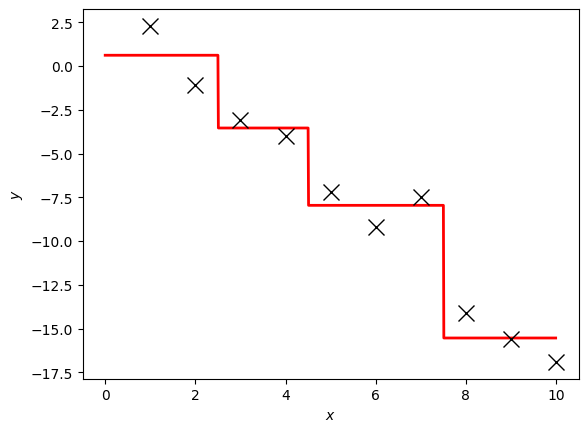

In [ ]:
## Regression of 1d data using decision tree
## Eli Tziperman, APM120, 202203
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

y = np.array([ 2.29, -1.06, -3.07, -4.01, -7.18, -9.2, -7.49, -14.1, -15.6, -16.9])

## Specify data to be classified:
Ndata=10
## training data:
np.random.seed(2021)
# X=np.arange(0.0,10,1)
N=len(X)
# y=2*X+2.1*(2*np.random.random(N)-1)
# y=np.round(y*10)/10
X.shape=(Ndata,1)

## fit tree:
regressor = DecisionTreeRegressor(random_state=0,min_samples_leaf=2)
regressor.fit(X, y)

## view the tree:
# tree.plot_tree(regressor)
# plt.show()

## use the trained tree to classify a single new point:
# Xtest=np.array([4])
# Xtest.shape=(-1,1)
# y1=regressor.predict(Xtest)
# print('Xtest=',end="");print(Xtest,end="")
# print('; y1=predict(tree1,Xtest)=',end=""); print(y1)

  
## use the trained tree to classify and plot a range of points:
Xtest=np.arange(0,10,0.01)
Xtest.shape=(-1,1)
y1=regressor.predict(Xtest)

plt.figure(1)
plt.plot(Xtest,y1,'r',linewidth=2)
# plt.plot(Xtest,2*Xtest,'--k',linewidth=0.5)
plt.plot(X,y,'kx',markersize=12,linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

6

(A)

A random forest is constructed by creating multiple trees and then averaging their results together. A random sample of data is taken from the original dataset with replacement, and this is repeated for many trees. This introduces stochasticity. Consequently, the errors of each of the trees are uncorrelated with each other (meaning their errors average out, leading to an unbiased estimate).

Advantages for regression problems: less susceptible to overfitting, improved accuracy, more versatile (can handle both categorical and continuous variables).

(B)

In [ ]:
X = np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

y = np.array([ 2.29, -1.06, -3.07, -4.01, -7.18, -9.2, -7.49, -14.1, -15.6, -16.9])

In [ ]:
## Regression of 1d data using decision tree in Matlab
## Eli Tziperman, APM120, 202203
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

X = np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

y = np.array([ 2.29, -1.06, -3.07, -4.01, -7.18, -9.2, -7.49, -14.1, -15.6, -16.9])

## Specify data to be classified:
np.random.seed(444555)
# X=np.arange(0.0,11,1)
N=len(X)
# y=2*X+1.1*(2*np.random.random(N)-1)
X.shape=(N,1)
y.shape=(N,)
## validation data:
X_valid=X+0.5
y_valid=2*X_valid+0.0*1.1*(2*np.random.random(N)-1)

tree1_indices = [0, 1, 2, 2, 2, 3, 3, 3, 5, 6]
tree2_indices = [0, 1, 2, 5, 6, 6, 7, 7, 7, 7]
tree3_indices = [0, 2, 2, 3, 4, 4, 5, 6, 7, 8]

X_tree1 = X[tree1_indices]
y_tree1 = y[tree1_indices]

X_tree2 = X[tree2_indices]
y_tree2 = y[tree2_indices]

X_tree3 = X[tree3_indices]
y_tree3 = y[tree3_indices]

forest = RandomForestRegressor(n_estimators=3, min_samples_leaf=2)

# Fit the trees
forest.fit(X_tree1.reshape(-1, 1), y_tree1)
forest.fit(X_tree2.reshape(-1, 1), y_tree2)
forest.fit(X_tree3.reshape(-1, 1), y_tree3)

## view the first few trees
plt.figure(1)
for itree in range(0,min(3,NumTrees)):
    plt.subplot(1,3,itree+1)
    tree.plot_tree(forest.estimators_[itree])

plt.draw()
plt.pause(0.1)

# ## use the trained tree to classify a new point:
# Xtest=np.asarray([[4.5]])
# Xtest.reshape(1,1)
# y1=forest.predict(Xtest)
# print('Xtest=[%g]:\n' % Xtest);         
# print('y1=forest.predict(Xtest)=%g' % y1);      

## use the trained tree to classify and contour a range of points:
i=-1
myrange=np.arange(0,10,0.01)
N=len(myrange)
y1=np.zeros((N,1))
y1a=np.zeros((N,NumTrees))
for x in myrange:
    i=i+1
    Xtest=np.asarray([[x]])
    y1[i]=forest.predict(Xtest)
    for itree in range(0,NumTrees):
        y1a[i,itree]=forest.estimators_[itree].predict(Xtest)


# complete figure started earlier:
plt.figure(2)
colors=['b','g','m']
for itree in range(0,NumTrees):
    plt.plot(myrange,y1a[:,itree],'--',linewidth=1.5,color=colors[itree])

plt.plot(myrange,y1,linewidth=3,color='r')
plt.plot(X,y,'x',markersize=12,linewidth=2,color='k')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim([-1, 11])
plt.ylim([-20, 3])
plt.grid()
plt.show()

NameError: name 'NumTrees' is not defined

<Figure size 640x480 with 0 Axes>

The single tree in the previous question suffered from overfitting. It paid too much attention to the point (7, -7.49), which clearly does not fit the overall structure of the data. This can be seen by the horizontal extension of the red line towards this point. 

The random forest is less biased in this regard, and instead fits the data more accurately. This is shown by the fact that the red line continues to step down, following the structure of the data, instead of being distracted by this outlier point. 

The reason for this difference is because the random forest model averages the results of three different trees, leading to a less biased estimate. 